In [1]:
# For stock market, the relationships between rise/fall Numbers and yearly return.
  # (1) rise No.: the number of rise (positive daily return) every year.
  # (2) fall No.: the number of fall (negative daily return) every year.
  # (3) rise_fall ratio: rise No. / fall No.
  # (4) yearly return: (last day point - first day point)/first day point

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


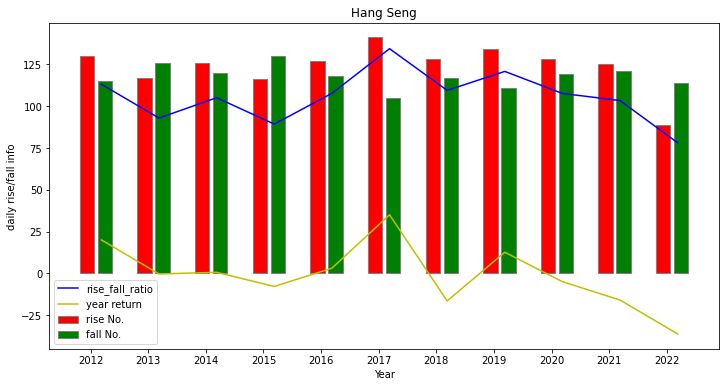

In [20]:
#!pip install yfinance # install packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  #df_data.head()
  return df_data

# calculate the daily return by (current_index - previous_index) / previous_index
def calculate_daily_return(df_data, OHLC_index="Close"):
  name1 = OHLC_index+"_previous"
  df_data[name1] = df_data[OHLC_index].shift(1)
  name2 = OHLC_index+"_delta"
  df_data[name2] = df_data[OHLC_index] - df_data[name1]
  name3 = OHLC_index+"_return"
  df_data[name3] = df_data[name2] / df_data[name1]
  del df_data[name1]
  del df_data[name2]
  new_feature = name3
  return df_data, new_feature

# get the market movement, 1 means rise and 0 fall
def get_market_movement(df_data, signal_name="Close_return"):
  df_data["movement"] = df_data[signal_name]>0
  df_data["movement"] = df_data["movement"].astype(int)
  return df_data

# get data by year with packing above functions
def get_data_by_year(ticker_name, year, close_or_volume="Close"):
  st, et = str(year)+"-01-01", str(year)+"-12-31"
  df_data = get_df_data(ticker_name, st, et)
  df_data, new_feature = calculate_daily_return(df_data, close_or_volume)
  df_data = get_market_movement(df_data, new_feature)
  return df_data

# daily rise, daily fall, rise-fall ratio
# get rise No., fall No., rise_fall ratio and yearly return each year for stock
def get_rise_fall_info(ticker_name, year, close_or_volume="Close"):
  df_data = get_data_by_year( ticker_name, year, close_or_volume )
    # year return for this stock
  year_return = (df_data["Close"][-1] - df_data["Close"][0])/df_data["Close"][0] * 100 
    # get daily rise/fall numbers, and their ratio
  rise_fall_signal = list(df_data["movement"])
  rise_signal = sum(rise_fall_signal)
  fall_signal = len(rise_fall_signal) - sum(rise_fall_signal)
  rise_fall_ratio = rise_signal/fall_signal * 100
  return rise_signal, fall_signal, rise_fall_ratio, year_return

"""
year = 2022
tn = "^IXIC"
close_or_volume = "Close" # Close, Volume
df_data = get_data_by_year( tn, year, close_or_volume )
df_data
"""

# ^IXIC, ^DJI, ^GSPC, ^HSI, 000001.SS, ^FTSE
tn = "^HSI"
index_name = { "^GSPC":"S&P 500", "^DJI":"Dow Jones", "^IXIC":"Nasdaq", 
              "000001.SS":"SSE Composite", "^HSI":"Hang Seng",
              "^FTSE":"FTSE 100",
              "BTC-USD":"BTC-USD", "CNY=X":"USD/CNY",
              "AAPL":"Apple", "AMZN":"Amazon"
        }


years = []
r_signals = []
f_signals = []
r_f_ratios = []
yr_returns = []
for i in range(2012, 2023):
  # st, et = "2022-01-01", "2022-12-31"
  which_year = i
  close_or_volume = "Close" # Close, Volume
  rise_signal, fall_signal, rise_fall_ratio, year_return = get_rise_fall_info(tn, which_year, close_or_volume)
  #print(which_year, rise_signal, fall_signal, "\t", rise_fall_ratio, year_return)
  years.append(which_year)
  r_signals.append(rise_signal)
  f_signals.append(fall_signal)
  r_f_ratios.append(rise_fall_ratio)
  yr_returns.append(year_return)


# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6))
# Set position of bar on X axis
br0 = years
br1 = [x - barWidth/4 for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth/4 for x in br2]
# Make the plot
plt.xticks( years )
plt.bar(br1, r_signals, color ='r', width = barWidth, edgecolor ='grey', label ='rise No.')
plt.bar(br3, f_signals, color ='g', width = barWidth, edgecolor ='grey', label ='fall No.')
plt.plot(br2, r_f_ratios, color ='b', label ='rise_fall_ratio')
plt.plot(br2, yr_returns, color ='y', label ='year return')
#plt.bar(br3, CSE, color ='b', width = barWidth, edgecolor ='grey', label ='rise_fall_ratio')
# Adding Xticks
plt.title(index_name[tn])
plt.xlabel('Year')
plt.ylabel("daily rise/fall info")
plt.legend()
plt.show()

11
10
9


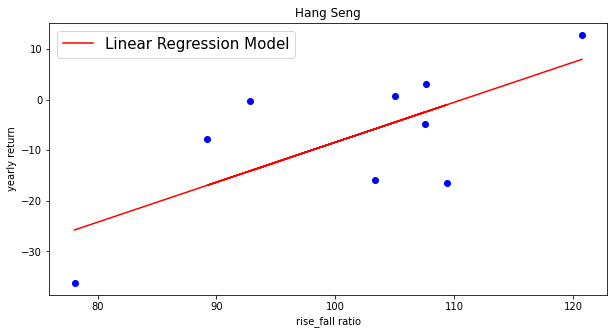

In [21]:
# remove the top n% and bottom n%
def denoise01(x, y, n=10):
  percent = n / 100
  z = zip( x, y )
  z = list(z)
  L = len(z)
  print(L)
  #
  z = sorted(z, key = lambda x: x[0])
  z = z[ int(L*percent):int(L*(1-percent)) ]
  L = len(z)
  print(L)
  #
  z = sorted(z, key = lambda x: x[1])
  z = z[ int(L*percent):int(L*(1-percent)) ]
  L = len(z)
  print(L)
  #
  #print(z)
  nx, ny = zip(*z)
  return nx, ny

def scale_list(tmp, scale=100):
  lst = []
  for v in tmp:
    lst.append(v/scale)
  return lst

from sklearn.linear_model import LinearRegression
import numpy as np

def LR_model_fitting(x, y):
  X_data = np.array(x)
  y_data = np.array(y)
  X_data = X_data.reshape(-1, 1)
  y_data = y_data.reshape(-1, 1)

  reg = LinearRegression().fit(X_data, y_data)
  k, b = reg.coef_, reg.intercept_
  k, b = k.reshape(1), b.reshape(1)
  k, b = k[0], b[0]
  #print(k, b)
  x_axis = x
  z_axis = []
  for v in x_axis:
    z_axis.append( k*v+b )
  return x_axis, z_axis

x, y = denoise01(r_f_ratios, yr_returns, 1)
#x = scale_list(x, 100)
#y = scale_list(y, 10)
#x, y = r_f_ratios, yr_returns
x_axis, z_axis = LR_model_fitting(x, y)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='b') # , label="rise_fall ratio vs yearly return"
plt.plot(x_axis, z_axis, label="Linear Regression Model", color='r')
plt.legend(fontsize = 15)
plt.xlabel("rise_fall ratio")
plt.ylabel("yearly return")
plt.title(index_name[tn])
plt.show()

In [5]:
# For stock market, the relationships between rise/fall Numbers and monthly return.
  # (1) rise No.: the number of rise (positive daily return) each month.
  # (2) fall No.: the number of fall (negative daily return) each month.
  # (3) rise_fall ratio: rise No. / fall No.
  # (4) monthly return: (last day point - first day point)/first day point

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

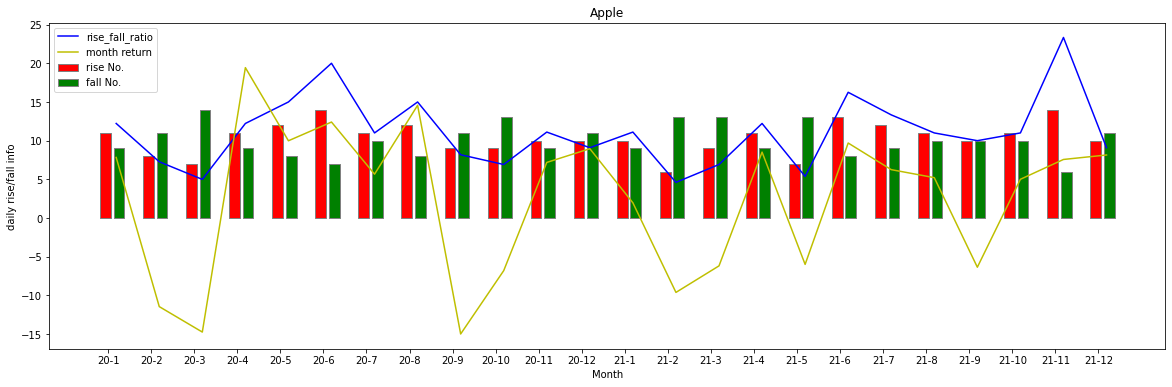

In [23]:
from datetime import timedelta, date


def daterange(date1, date2):
  tmp = []
  for n in range(int ((date2 - date1).days)+1):
    tmp.append( date1 + timedelta(n) )
  return tmp

def month_first_last01(year_from, year_to, month_from, month_to):
  start_dt = date(year_from, month_from, 1)
  end_dt = date(year_to, month_to, 1)
  dt_range = daterange(start_dt, end_dt)
  month_first = dt_range[0]
  month_last = dt_range[-2]
  return month_first.strftime("%Y-%m-%d"), month_last.strftime("%Y-%m-%d")

def month_first_last02(year, month):
  month_first, month_last = "", ""
  if 1<=month and month<12:
    month_first, month_last = month_first_last01(year, year, month, month+1)
  elif month==12:
    month_first, month_last = month_first_last01(year, year+1, 12, 1)
  return month_first, month_last

# get data by year with packing above functions
def get_data_by_month(ticker_name, year, month, close_or_volume="Close"):
  st, et = month_first_last02(year, month)
  df_data = get_df_data(ticker_name, st, et)
  df_data, new_feature = calculate_daily_return(df_data, close_or_volume)
  df_data = get_market_movement(df_data, new_feature)
  return df_data

# daily rise, daily fall, rise-fall ratio
# get rise No., fall No., rise_fall ratio and yearly return each year for stock
def get_rise_fall_info_by_month(ticker_name, year, month, close_or_volume="Close"):
  df_data = get_data_by_month( ticker_name, year, month, close_or_volume )
    # monthly return for this stock
  month_return = (df_data["Close"][-1] - df_data["Close"][0])/df_data["Close"][0] * 100 
    # get daily rise/fall numbers, and their ratio
  rise_fall_signal = list(df_data["movement"])
  rise_signal = sum(rise_fall_signal)
  fall_signal = len(rise_fall_signal) - sum(rise_fall_signal)
  rise_fall_ratio = rise_signal/fall_signal * 10
  return rise_signal, fall_signal, rise_fall_ratio, month_return


###
tn = "AAPL" # 
index_name = { "^GSPC":"S&P 500", "^DJI":"Dow Jones", "^IXIC":"Nasdaq", 
              "000001.SS":"SSE Composite", "^HSI":"Hang Seng",
              "^FTSE":"FTSE 100",
              "BTC-USD":"BTC-USD", "CNY=X":"USD/CNY",
              "AAPL":"Apple"
        }


x_marks = []
months = []
r_signals = []
f_signals = []
r_f_ratios = []
mn_returns = []

ii = 0
for year in range(2020, 2022):
  for month in range(1, 13):
    close_or_volume = "Close"
    rise_signal, fall_signal, rise_fall_ratio, month_return = get_rise_fall_info_by_month(tn, year, month, close_or_volume)
    ii += 1
    months.append(ii) # year+month*0.01
    x_marks.append( str(year)[2:]+"-"+str(month) ) # str(year)[2:]+"-"+str(month), year*100+month
    r_signals.append(rise_signal)
    f_signals.append(fall_signal)
    r_f_ratios.append(rise_fall_ratio)
    mn_returns.append(month_return)


#rise_signal, fall_signal, rise_fall_ratio, month_return
months, r_signals, f_signals, r_f_ratios, mn_returns

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 6))
# Set position of bar on X axis
br0 = months
br1 = [x - barWidth/4 for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth/4 for x in br2]
# Make the plot
plt.xticks( months, x_marks )
plt.bar(br1, r_signals, color ='r', width = barWidth, edgecolor ='grey', label ='rise No.')
plt.bar(br3, f_signals, color ='g', width = barWidth, edgecolor ='grey', label ='fall No.')
plt.plot(br2, r_f_ratios, color ='b', label ='rise_fall_ratio')
plt.plot(br2, mn_returns, color ='y', label ='month return')
#plt.bar(br3, CSE, color ='b', width = barWidth, edgecolor ='grey', label ='rise_fall_ratio')
# Adding Xticks
plt.title(index_name[tn])
plt.xlabel('Month')
plt.ylabel("daily rise/fall info")
plt.legend()
plt.show()

24
23
22


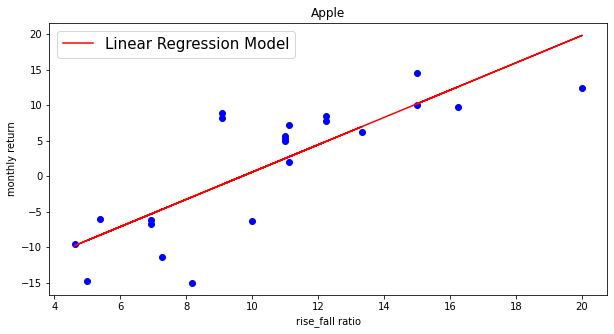

In [24]:
# remove the top n% and bottom n%
def denoise01(x, y, n=10):
  percent = n / 100
  z = zip( x, y )
  z = list(z)
  L = len(z)
  print(L)
  #
  z = sorted(z, key = lambda x: x[0])
  z = z[ int(L*percent):int(L*(1-percent)) ]
  L = len(z)
  print(L)
  #
  z = sorted(z, key = lambda x: x[1])
  z = z[ int(L*percent):int(L*(1-percent)) ]
  L = len(z)
  print(L)
  #
  #print(z)
  nx, ny = zip(*z)
  return nx, ny

x, y = denoise01(r_f_ratios, mn_returns, 1)
#x, y = r_f_ratios, mn_returns

x_axis, z_axis = LR_model_fitting(x, y)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='b') # , label="rise_fall ratio vs yearly return"
plt.plot(x_axis, z_axis, label="Linear Regression Model", color='r')
plt.legend(fontsize = 15)
plt.xlabel("rise_fall ratio")
plt.ylabel("monthly return")
plt.title(index_name[tn])
plt.show()